In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [3]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [4]:
# define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])

In [5]:
# load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

#### Cross Entropy Loss

In [6]:
# build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# define the loss
criterion = nn.CrossEntropyLoss()

# get our data
images, labels = next(iter(trainloader))

# flatten images
images = images.view(images.shape[0], -1)

# forward pass, get our logits
logits = model(images)
print('logits:',logits)

# calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

logits: tensor([[ 0.0999,  0.1044,  0.0696,  0.0628, -0.0431,  0.0703,  0.1026,  0.1474,
          0.0503,  0.0183],
        [ 0.0678,  0.0988,  0.1199,  0.1045, -0.0105,  0.0739,  0.0625,  0.1381,
          0.0761, -0.0504],
        [ 0.0580,  0.0465,  0.0398,  0.1099, -0.0443,  0.1226,  0.0271,  0.0727,
         -0.0395, -0.0589],
        [ 0.0236,  0.0722,  0.0669,  0.1496, -0.0303,  0.0894,  0.0863,  0.1988,
          0.0342, -0.0894],
        [ 0.1025,  0.0602,  0.1200,  0.0854,  0.0000,  0.1168,  0.0748,  0.2205,
          0.1016,  0.0194],
        [ 0.0324,  0.1419,  0.0533,  0.1027,  0.0266,  0.1524,  0.0549,  0.1144,
         -0.0074, -0.1142],
        [ 0.0803,  0.1133,  0.0764,  0.1068, -0.0509,  0.0975,  0.0607,  0.1127,
          0.0346, -0.0264],
        [ 0.0653,  0.0714,  0.0188,  0.0361, -0.0568,  0.1020,  0.1100,  0.1024,
          0.1146, -0.0055],
        [ 0.1279,  0.1587,  0.0883,  0.0358, -0.0407,  0.1285,  0.0494,  0.1090,
          0.0319, -0.0178],
        [ 0

#### Negative Log Likelihood Loss

In [7]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

# define the loss
criterion = nn.NLLLoss()

# get our data
images, labels = next(iter(trainloader))

# flatten images
images = images.view(images.shape[0], -1)

# forward pass, get our log-probabilities
logps = model(images)
print('logps:',logps)

# calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

logps: tensor([[-2.2446, -2.4286, -2.3735, -2.2371, -2.2173, -2.2000, -2.3014, -2.4951,
         -2.2062, -2.3695],
        [-2.2335, -2.4340, -2.3877, -2.2518, -2.2388, -2.1790, -2.2660, -2.4616,
         -2.2430, -2.3728],
        [-2.2959, -2.3698, -2.3806, -2.2576, -2.3006, -2.2078, -2.3075, -2.3483,
         -2.1728, -2.4115],
        [-2.2640, -2.3710, -2.3538, -2.2533, -2.1837, -2.1967, -2.2748, -2.4910,
         -2.2814, -2.3964],
        [-2.2502, -2.4222, -2.3907, -2.2888, -2.1332, -2.1903, -2.2824, -2.5325,
         -2.2387, -2.3592],
        [-2.2916, -2.4401, -2.3828, -2.2602, -2.2556, -2.1771, -2.2608, -2.3831,
         -2.2221, -2.3856],
        [-2.2469, -2.3275, -2.4265, -2.3020, -2.2690, -2.1676, -2.3085, -2.4779,
         -2.1828, -2.3603],
        [-2.2946, -2.3110, -2.3617, -2.3398, -2.2790, -2.1793, -2.2990, -2.3853,
         -2.1934, -2.4084],
        [-2.2203, -2.3262, -2.3917, -2.3340, -2.2729, -2.2006, -2.2694, -2.4498,
         -2.1713, -2.4313],
        [-2.

#### Get gradients using backward to update the weights

In [8]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [-0.0014, -0.0014, -0.0014,  ..., -0.0014, -0.0014, -0.0014],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        ...,
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026],
        [-0.0012, -0.0012, -0.0012,  ..., -0.0012, -0.0012, -0.0012],
        [-0.0030, -0.0030, -0.0030,  ..., -0.0030, -0.0030, -0.0030]])


In [9]:
from torch import optim

# optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('\n')
print('Gradient -', model[0].weight.grad)

# take an update step and few the new weights
optimizer.step()

print('\n')
print('Updated weights - ', model[0].weight)

Initial weights -  Parameter containing:
tensor([[-0.0028, -0.0334,  0.0160,  ..., -0.0031, -0.0083, -0.0170],
        [-0.0232,  0.0223,  0.0020,  ..., -0.0091,  0.0205,  0.0212],
        [ 0.0277,  0.0170,  0.0269,  ..., -0.0096,  0.0299,  0.0346],
        ...,
        [-0.0328, -0.0144,  0.0197,  ...,  0.0007,  0.0041,  0.0210],
        [-0.0022,  0.0088,  0.0005,  ...,  0.0065, -0.0325,  0.0202],
        [-0.0013,  0.0311, -0.0073,  ...,  0.0214, -0.0325, -0.0265]],
       requires_grad=True)


Gradient - tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        ...,
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0007, -0.0007, -0.0007,  ..., -0.0007, -0.0007, -0.0007],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


Updated weights -  Parameter containing:
tensor([

## Full Training

In [11]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        # flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9280028730821508
Training loss: 0.8929886843032165
Training loss: 0.5305934790482145
Training loss: 0.43063837922076936
Training loss: 0.3862765329256495


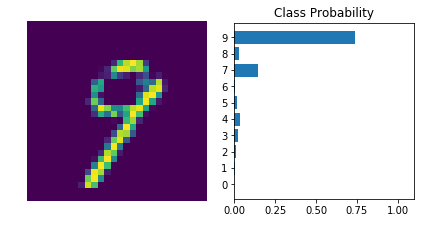

In [12]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)
    
# output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

<hr/>